In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# train_path = '/content/drive/MyDrive/Dataset/test'

Mounted at /content/drive


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3504 files belonging to 18 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1921 files belonging to 18 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 18), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[182.25 177.25 174.25]
   [181.5  176.5  173.5 ]
   [179.5  174.5  171.5 ]
   ...
   [191.75 186.75 190.75]
   [190.75 185.75 189.75]
   [192.5  187.5  191.5 ]]

  [[181.   176.   173.  ]
   [181.25 176.25 173.25]
   [183.   178.   175.  ]
   ...
   [190.   185.   189.  ]
   [189.5  184.5  188.5 ]
   [189.75 184.75 188.75]]

  [[182.25 177.25 174.25]
   [182.25 177.25 174.25]
   [186.75 181.75 178.75]
   ...
   [190.25 185.25 189.25]
   [189.25 184.25 188.25]
   [188.   183.   187.  ]]

  ...

  [[173.   165.   163.  ]
   [174.25 166.25 164.25]
   [171.25 163.25 161.25]
   ...
   [174.5  168.5  172.5 ]
   [177.25 171.25 175.25]
   [175.   169.   173.  ]]

  [[165.75 157.75 155.75]
   [180.75 172.75 170.75]
   [172.5  164.5  162.5 ]
   ...
   [176.75 170.75 174.75]
   [179.75 173.75 177.75]
   [165.   159.   163.  ]]

  [[165.25 157.25 155.25]
   [167.5  159.5  157.5 ]
   [165.   157.   155.  ]
   ...
   [165.5  159.5  163.5 ]
   [167.5  161.5  165.5 ]
   [175.5  169.5  17

### Bullding Model

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
##Building Convolutional layer

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [ ]:
model.add(Dropout(0.25))  ## to avoid overfitting


In [ ]:
model.add(Flatten())


In [ ]:
model.add(Dense(units=1500,activation='relu'))

In [ ]:
model.add(Dropout(0.4))


In [ ]:
#Output laye
model.add(Dense(units=18,activation='softmax'))

### Compiling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

### Model Training

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
219/219 [==============================] - 1019s 5s/step - loss: 2.4098 - accuracy: 0.2255 - val_loss: 2.1821 - val_accuracy: 0.3050
Epoch 2/10
219/219 [==============================] - 19s 83ms/step - loss: 1.5138 - accuracy: 0.5077 - val_loss: 1.0831 - val_accuracy: 0.6543
Epoch 3/10
219/219 [==============================] - 18s 83ms/step - loss: 0.9797 - accuracy: 0.6689 - val_loss: 0.8028 - val_accuracy: 0.7288
Epoch 4/10
219/219 [==============================] - 20s 88ms/step - loss: 0.7209 - accuracy: 0.7588 - val_loss: 0.6048 - val_accuracy: 0.7975
Epoch 5/10
219/219 [==============================] - 19s 84ms/step - loss: 0.5469 - accuracy: 0.8193 - val_loss: 0.5409 - val_accuracy: 0.8329
Epoch 6/10
219/219 [==============================] - 21s 93ms/step - loss: 0.4374 - accuracy: 0.8442 - val_loss: 0.6267 - val_accuracy: 0.7939
Epoch 7/10
219/219 [==============================] - 18s 81ms/step - loss: 0.3327 - accuracy: 0.8878 - val_loss: 0.9198 - val_accuracy:

## Model Evaluation

In [ ]:
#Model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

219/219 [==============================] - 11s 50ms/step - loss: 0.0630 - accuracy: 0.9814


In [ ]:
print(train_loss,train_acc)

0.06297997385263443 0.9814497828483582


In [ ]:
#modelon validation set
val_loss,val_acc = model.evaluate(validation_set)

61/61 [==============================] - 7s 98ms/step - loss: 0.3203 - accuracy: 0.8933


In [ ]:
print(val_loss,val_acc)

0.32027730345726013 0.8932847380638123


## Saving Model

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

{'loss': [2.4098360538482666,
  1.513841986656189,
  0.979735791683197,
  0.7208687663078308,
  0.5468620657920837,
  0.4373508393764496,
  0.33272990584373474,
  0.3173534572124481,
  0.2404651790857315,
  0.22532691061496735],
 'accuracy': [0.2254566252231598,
  0.5077054500579834,
  0.6689497828483582,
  0.7588470578193665,
  0.8193492889404297,
  0.8441780805587769,
  0.8878424763679504,
  0.8906963467597961,
  0.916381299495697,
  0.9215182662010193],
 'val_loss': [2.1821157932281494,
  1.0831434726715088,
  0.8028191328048706,
  0.6048212647438049,
  0.5408626198768616,
  0.6266533136367798,
  0.9197730422019958,
  0.35358819365501404,
  0.3266643285751343,
  0.3202773332595825],
 'val_accuracy': [0.30504944920539856,
  0.6543467044830322,
  0.7287870645523071,
  0.7975013256072998,
  0.8328995108604431,
  0.7938573956489563,
  0.7496095895767212,
  0.887037992477417,
  0.890161395072937,
  0.8932847380638123]}

In [ ]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['accuracy']

[0.2254566252231598,
 0.5077054500579834,
 0.6689497828483582,
 0.7588470578193665,
 0.8193492889404297,
 0.8441780805587769,
 0.8878424763679504,
 0.8906963467597961,
 0.916381299495697,
 0.9215182662010193]

### Accuracy Visualization

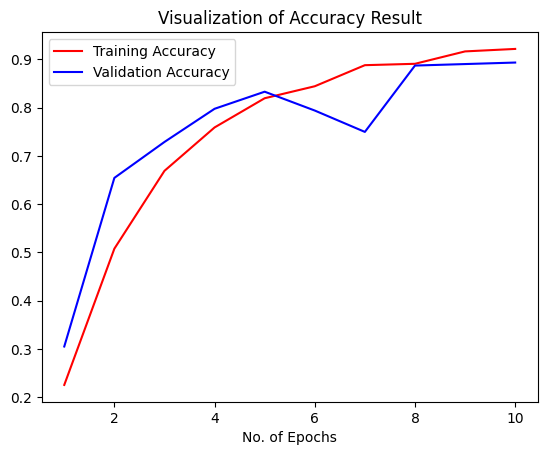

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
#Some other metrics for model evaluation


In [ ]:
class_name = validation_set.class_names


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1921 files belonging to 18 classes.


In [ ]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1921/1921 [==============================] - 10s 5ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true


<tf.Tensor: shape=(1921,), dtype=int64, numpy=array([ 0,  0,  0, ..., 17, 17, 17])>

In [ ]:
predicted_categories


<tf.Tensor: shape=(1921,), dtype=int64, numpy=array([12,  0,  0, ..., 17, 17, 17])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                            precision    recall  f1-score   support

                  Apple___Cedar_apple_rust       0.96      0.80      0.87       220
                           Apple___healthy       0.95      0.75      0.84       134
               Corn_(maize)___Common_rust_       0.99      0.95      0.97       131
                    Corn_(maize)___healthy       0.98      0.98      0.98       125
                         Grape___Black_rot       0.79      0.83      0.81        64
              Grape___Esca_(Black_Measles)       0.87      0.93      0.90        56
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.94      0.92      0.93       130
                           Grape___healthy       0.88      0.95      0.92        63
  Orange___Haunglongbing_(Citrus_greening)       0.86      0.96      0.91       131
                     Potato___Early_blight       0.94      0.95      0.94        77
                      Potato___Late_blight       0.85      0.93      0.89  

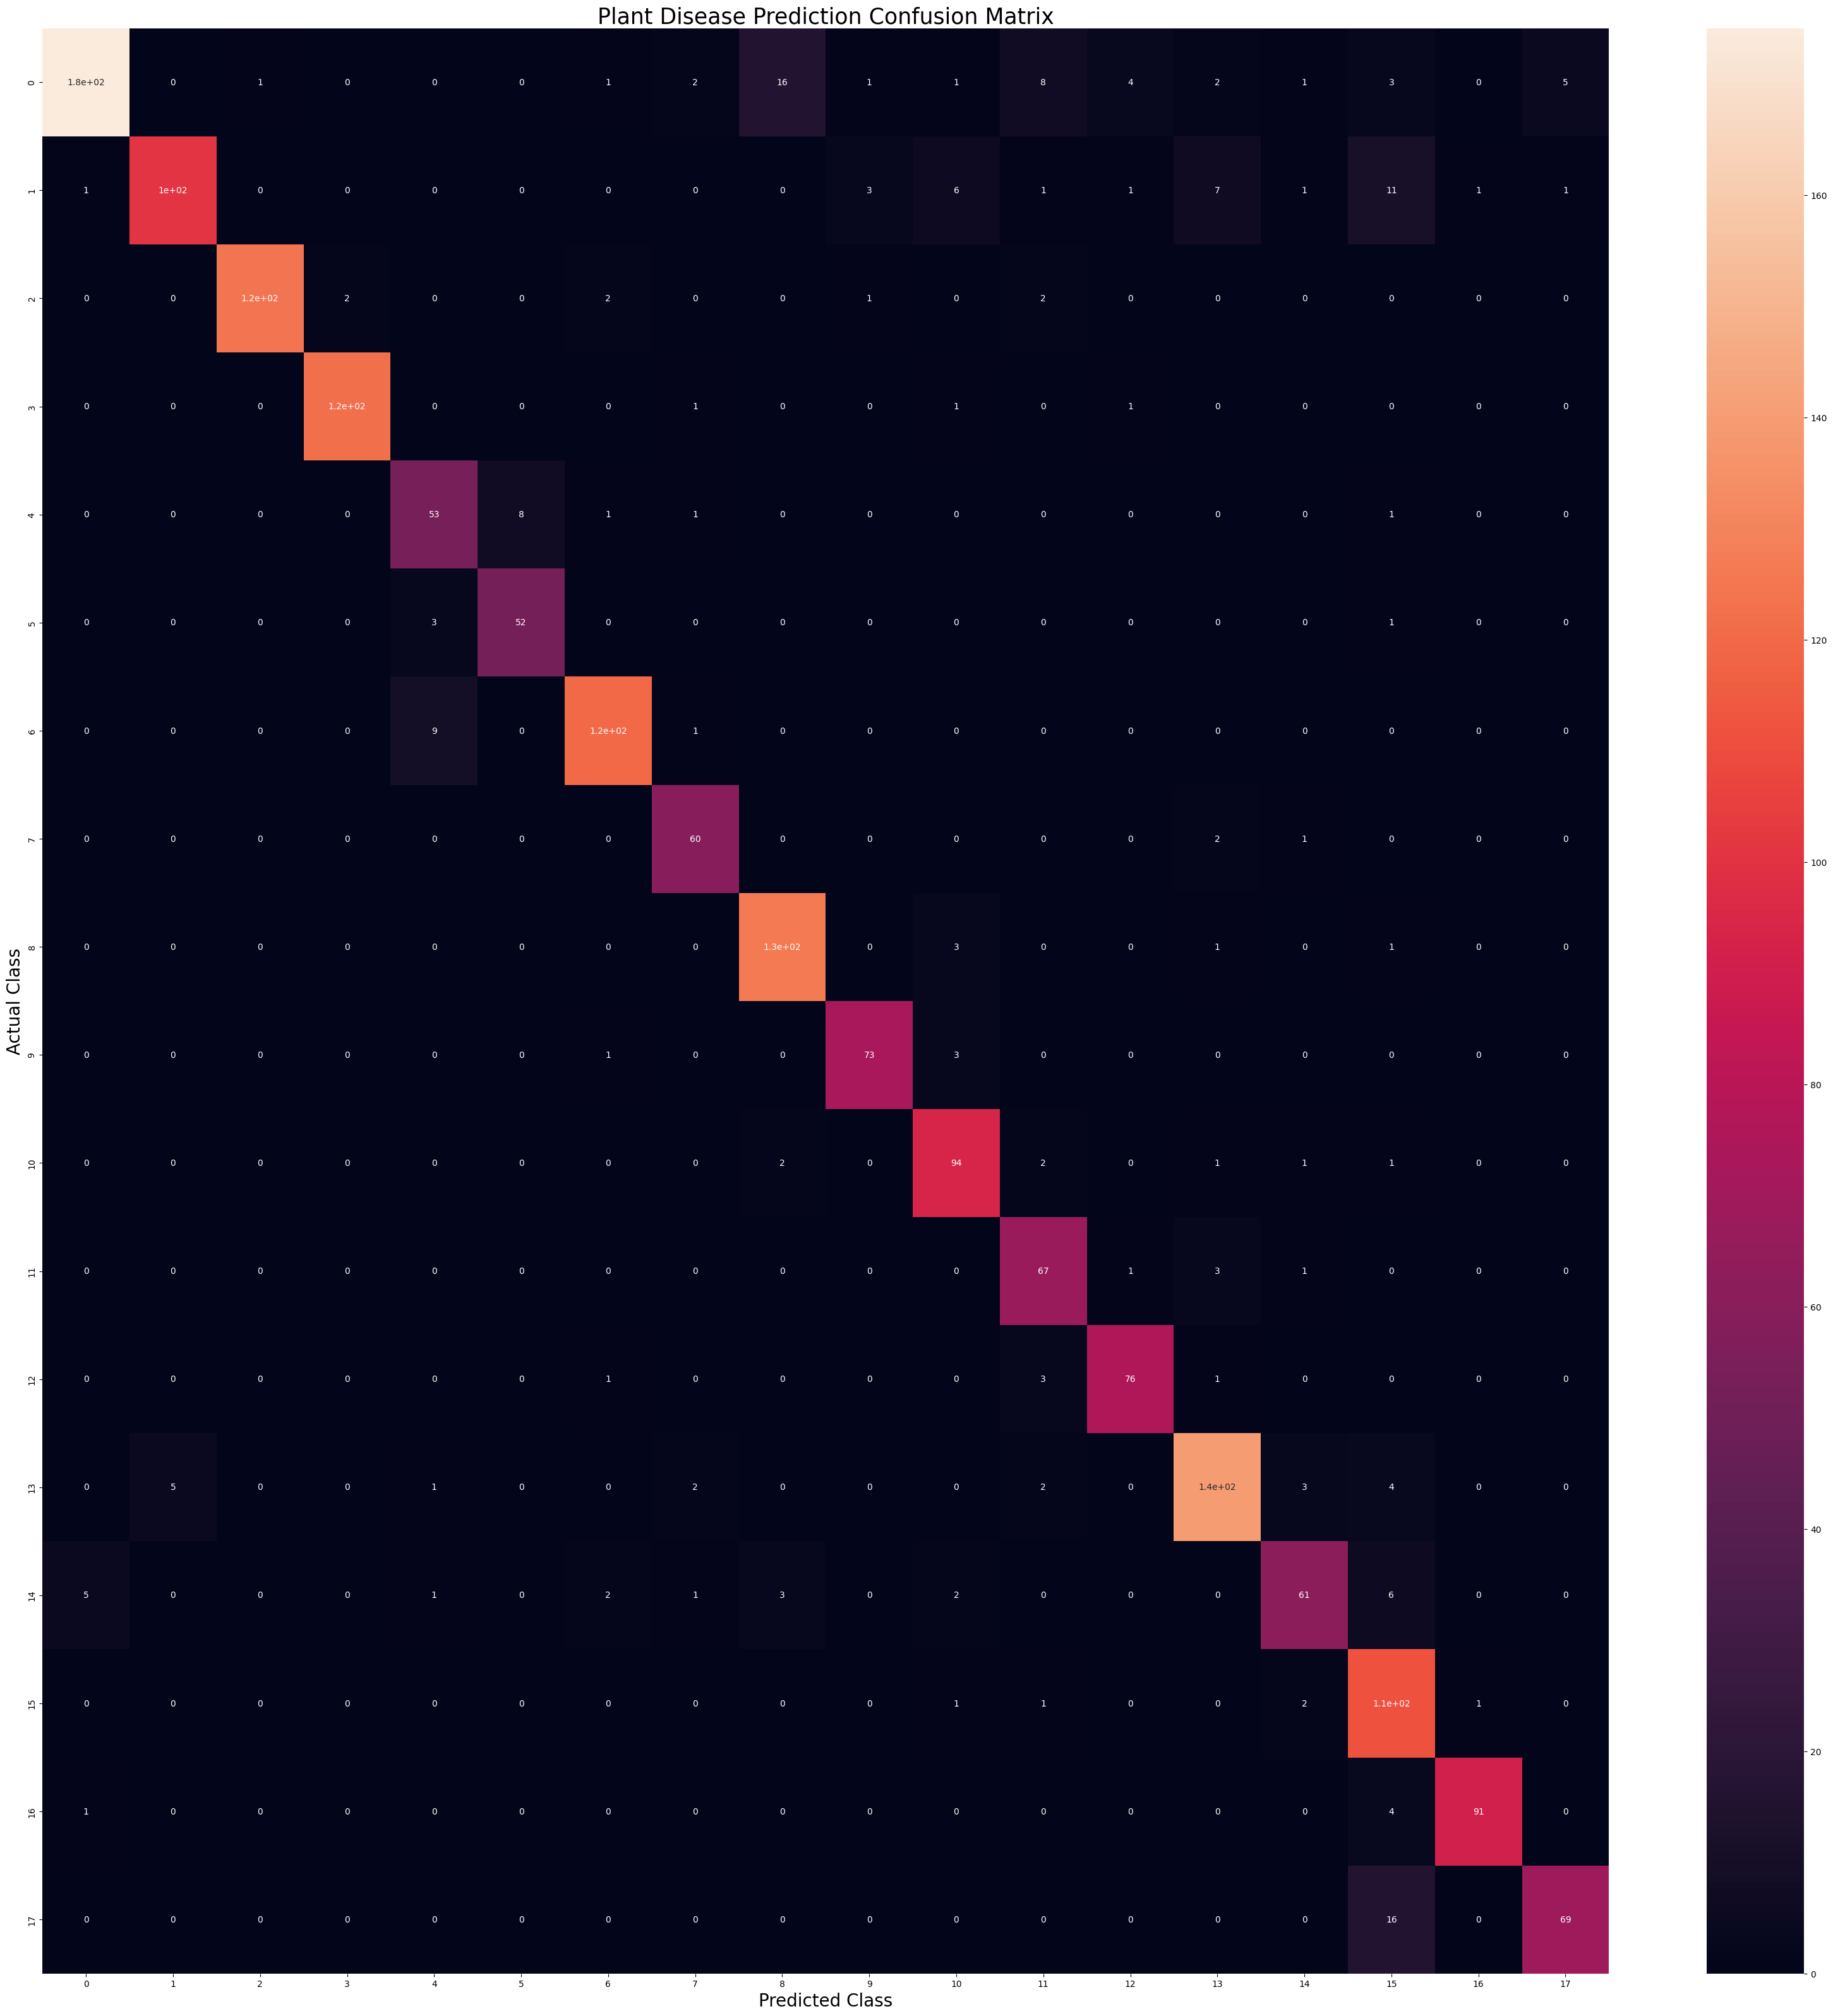

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()